<a href="https://colab.research.google.com/github/RubenCarty/Deep-Learning/blob/main/Fraudes_Bancarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####GDOWN : es una herramienta que nos permite descargar recursos como archivos de una url publica o teniendo una llave compartida

In [ ]:
#Descargamos este recursos para descargar archivos desde drive mediante el id
!pip install gdown

###__Importamos las librerias que vamos a utilzar para todo el proyecto como :__
<ol>
  <li>Pandas : Procesamiento , manipulacion y análisis de matrices</li>
  <li>Numpy : Procesamiento de funciones estadisticas y programcion cientifica </li>
  <li>Matplotlib : Modelar y organizar los datos obtenidos en graficos para su posterior análisis </li>
  <li>SKlearn : Desarrolla Modelos de Machine Learning</li>
</ol>



# **Nota: describir todos las librerias usadas**

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Modelado con Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#Descargar un archivo compartido
import gdown
print("Librerias importadas")

####Enviamos como parámetros a gdown la url donde se encuentra nuestro archivo (.csv) y con que nombre lo vamos a descargar (creditcard.csv)

In [ ]:
#Descargamos el archivo previamente compartido con un enlace
url = 'https://drive.google.com/uc?export=download&id=1xtMxtDNEOOTBEqJvkUSznDBezC9HTsmg'
output = 'creditcard.csv'
gdown.download(url,output,quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1xtMxtDNEOOTBEqJvkUSznDBezC9HTsmg
From (redirected): https://drive.google.com/uc?export=download&id=1xtMxtDNEOOTBEqJvkUSznDBezC9HTsmg&confirm=t&uuid=f7803fd6-d5d8-4470-82a4-f54d1dbeccb1
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:01<00:00, 76.1MB/s]


'creditcard.csv'

### Cargamos los datos utilizando **Pandas** y verificamos que no haya pérdida de información. En este caso, confirmamos que las filas y columnas coinciden correctamente con el archivo original.


In [ ]:
#Lectura del archivo desde el enlace de google drive
datos = pd.read_csv(output)

#Imprimimos las dimensiones
print(f"Dimensiones : {datos.shape}")

#Imprimimos los datos
datos


Dimensiones : (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


####En este caso, normalizamos las columnas cuyos valores exceden el rango de 0 a 1. Específicamente, las columnas **Amount** y **Time**. Este proceso asegura que el entrenamiento del modelo no sea sesgado. El **MinMaxScaler** actúa obteniendo los valores mínimo y máximo de las columnas, asignando el valor 0 al mínimo y el valor 1 al máximo. De este modo, los valores intermedios se representan dentro de este rango, sin ser inferiores a cero ni superiores a uno.


In [ ]:
datos

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
datos.shape

(284807, 31)

In [ ]:
#Normalizamos la columna amount porque tiene numeros muy grandes
scaler = MinMaxScaler()
datos['Amount'] = scaler.fit_transform(datos[['Amount']])
datos['Time'] = scaler.fit_transform(datos[['Time']])
print(datos['Amount'].describe())
print(datos['Time'].describe())

count    284807.000000
mean          0.003439
std           0.009736
min           0.000000
25%           0.000218
50%           0.000856
75%           0.003004
max           1.000000
Name: Amount, dtype: float64
count    284807.000000
mean          0.548717
std           0.274828
min           0.000000
25%           0.313681
50%           0.490138
75%           0.806290
max           1.000000
Name: Time, dtype: float64


###Separamos las variables independientes del resultado , para posteriormente hacer el debido preprocesammiento.

In [ ]:
# separamos las variables independientes y el tiempo del resultado
X = datos.drop(['Class'], axis=1)
y = datos['Class']

####Dado que tenemos un conjunto de clases desbalanceadas, la clase fraudulenta (representada por ceros) es minoritaria en comparación con la clase legítima (representada por unos). Mostramos esta distribución en un gráfico para poder calcular la desproporción entre ambas clases. En la salida del código podemo observar que para la clase fraudulenta tenemos 284315 registros , pero para la clase legitima tenemos 492 ,lo cual debemos balancear para que el entrenamiento sea optimo.


Class
0    284315
1       492
Name: count, dtype: int64


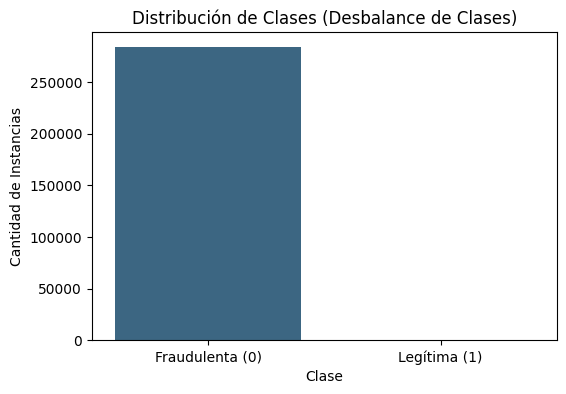

In [ ]:
#Ver el desbalanceo de las clases.
# Contar la cantidad de instancias de cada clase
class_counts = datos['Class'].value_counts()
print(class_counts)

# Graficar un gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de Clases (Desbalance de Clases)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Instancias')
plt.xticks([0, 1], ['Fraudulenta (0)', 'Legítima (1)'])
plt.show()

###Como se mencionó anteriormente, debido al desbalanceo en las clases, utilizamos **SMOTE** (Synthetic Minority Over-sampling Technique) para realizar un sobremuestreo. Esto se debe a que la clase fraudulenta (representada por ceros) es minoritaria en comparación con la clase legítima (representada por unos). SMOTE emplea un algoritmo **KNN** (K-Nearest Neighbors) para generar nuevas instancias para la clase minoritaria. A través de los vecinos más cercanos, el algoritmo crea registros sintéticos hasta igualar la cantidad de instancias de la clase legítima, logrando así un conjunto de datos balanceado , como lo podemos ver en la salida del código.

>NOTA: Las nuevas instancias generadas por **SMOTE** no son iguales a las ya existentes.

Distribución post-SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


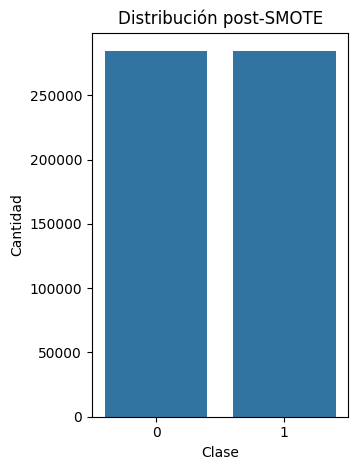

In [ ]:
#Se aplica el sobremuestreo con SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Verificar el balanceo
print("Distribución post-SMOTE:")
print(pd.Series(y_res).value_counts())

plt.subplot(1, 2, 2)
sns.countplot(x=y_res)
plt.title("Distribución post-SMOTE")
plt.xlabel("Clase")
plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()


####Una ves teniendo los datos balanceados , sepramos los registros para el entrenamiento (70%) y hacer las pruebas (30%)
<ol>
  <li><strong>train_test_split</strong>: divide los datos en dos conjuntos (entrenamiento y pruebas) , este ultimo no sera mostrado al modelo</li>
  <li><strong>x_res y _res</strong>: son las variables independientes de nuestro dataset y son las etiquetas (ceros y unos) respectivamente</li>
  <li><strong>tes_size=0.3</strong>: Especifica el tamaño de la prueba en pocentaje , por ende el restante es para el entrenamiento</li>
  <li><strong>stratify=y_res</strong>: Especifica que la proporcion de las clases , se la misma tanto para el entrenamiento y para las pruebas</li>
</ol>

In [ ]:
#Separamos los datos para el entrenamiento(70% de los datos) y prueba (30% de las pruebas)
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

####Creamos las 3 capas y las neuronas (30 , 16 , 1) antes de empezar el entrenamiento
<ol>
  <li><strong>Sequential</strong>: tipo de modelo en keras que nos permite apilar las capas una sobre otra</li>
  <li><strong>Dense(32)</strong>: Define la capa (full connected layer) con 32 neuronas</li>
  <li><strong>input_dim</strong>: enviamos el numero de entradas que recibe la red neuronal , en este caso , las variables independientes</li>
  <li><strong>activation</strong>: Definimos la funcion de activación Relu , cuya formula es : <strong>f(x) = max(0,x)</strong>, si la entrada es un numero negativo , la funcion de activación devuelve un cero . Si es un número positivo devuelve el mismo numero</li>
  <li><strong>Dropout</strong>: Para evitar el overfitting , apaga el 20% de las neuronas , con el fin de generar una independencia</li>
</ol>

>NOTA: si una neurona no envia informaion a las demas neuronas , es decir , cuando la funcion de activacion devuelve un cero , se considera una __"muerte de neurona"__


In [ ]:
#creamos las neuronas y definimos las funciones de activacion (RELU Y SIGMOIDE)
model_mlp = Sequential()
model_mlp.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(16, activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(1, activation='sigmoid'))
model_mlp.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', AUC(name='auc')])

####Entrenamos el modelo con __EarlyStopping__ para evitar el overfitting , lo que hace es , cuando detecta de que el accurancy es muy cercano a overfitting , detiene el entrenamiento sin importar si las vueltas o epocas se hayan completado

<ol>
  <li><strong>monitor</strong>: si la perdida no mejora el entrenamiento se detendrá, se usa como metrica</li>
  <li><strong>patience</strong>: indica cuantas epocas debe realizar a pesar de que la perdida no mejora</li>
  <li><strong>restore_best_weights</strong>: obtiene el peso en el mismo punto que se detuvo en el entrenamiento</li>
  <li><strong>x_train , y_train</strong>: Definimos las caracteristicas de entrada para entrenar el modelo y las etiquetas de salida respectivamente</li>
  <li><strong>validation</strong>: indica el porcentaje que debe separar para validar el entrenamiento , es decir que del 70% que separamos para el entrenamiento , usará el 80% para entrenar el modelo y el 20% para validarlo</li>
  <li><strong>batch_size</strong>: Define el tamaño del lote que se pasará a la siguiente neurona</li>
  <li><strong>verbose</strong>: controla la cantida de informacion que se va a mostrar en la salda del código</li>
</ol>


#

In [ ]:
#Entrenamos el modelo con earlystopping para evitar el overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_mlp = model_mlp.fit(X_train, y_train, validation_split=0.2, epochs=100,
                            batch_size=2048, callbacks=[early_stop], verbose=0)

KeyboardInterrupt: 

####Realizamos las predicciones y generamos un reporte  de evaluacion con mapas de calor.

<ol>
<li>Verdaderos Negativos : 85,241
</li>
<li>
Falsos Positivos: 54
</li>
<li>
Falsos Negativos: 0
</li>
<li>
Verdaderos positivos:85,294
</li>
</ol>


###RESUMEN:

<ol>
<li>El modelo está clasificando correctamente las instancias de ambas clases (0 y 1). No cometió falsos negativos (FN = 0), lo cual es muy positivo en problemas de clasificación binaria.
</li>
<li>
El número de falsos positivos es muy bajo (54), lo que indica que el modelo rara vez clasifica incorrectamente una instancia legítima como fraudulenta.
</li>
</ol>


In [ ]:
#Predicciones
y_pred_mlp = model_mlp.predict(X_test)
y_pred_labels_mlp = (y_pred_mlp > 0.5).astype(int)


5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [ ]:
print('datos test ' , len(X_test))

datos test  170589


####Mostramos mediante un grafico la curva ROC para evaluar el rendimiento del modelo
<ol>
 El modelo tiene una gran capacidad para distinguir entre clases , dado que el AUC es del 0.999 .Tiene una gran capacidad discriminativa.
</ol>

### ENTRENAMIENTO RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

###ENTRENAMIENTO CNN

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(16, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(1, activation='sigmoid'))


model_cnn.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', AUC(name='auc')])


early_stop_cnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_cnn = model_cnn.fit(X_train_cnn, y_train, validation_split=0.2, epochs=100,
                            batch_size=2048, callbacks=[early_stop_cnn], verbose=0)

y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_labels_cnn = (y_pred_cnn > 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


               Accuracy       AUC
MLP            0.999596  0.999933
Random Forest  0.988188  0.999383
CNN            0.995217  0.999711


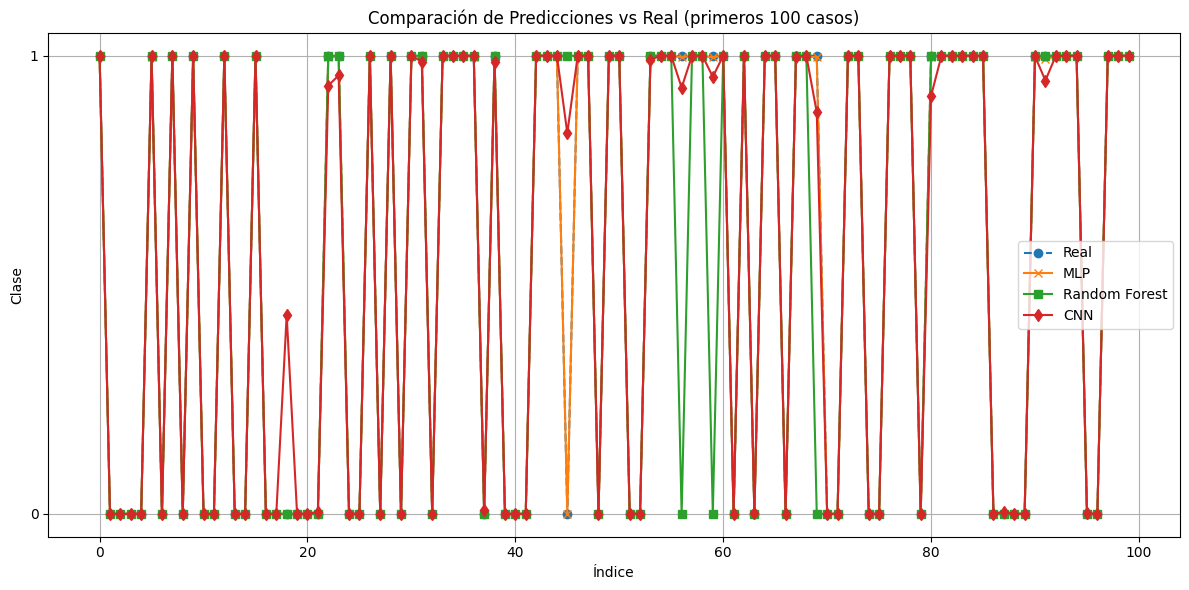

In [ ]:
###COMPARATIVA DE LOS TRES MODELOS EN UN GRAFICO
from sklearn.metrics import accuracy_score, roc_auc_score
resultados_modelos = {
    'MLP': {
        'Accuracy': accuracy_score(y_test, y_pred_labels_mlp),
        'AUC': roc_auc_score(y_test, y_pred_mlp)
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'AUC': roc_auc_score(y_test, y_pred_proba_rf)
    },
    'CNN': {
        'Accuracy': accuracy_score(y_test, y_pred_labels_cnn),
        'AUC': roc_auc_score(y_test, y_pred_cnn)
    }
}

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados_modelos).T
print(df_resultados)

# Guardar en CSV
df_resultados.to_csv("resultados_modelos.csv", index=True)

# Asegúrate de guardar las predicciones binarias
y_pred_mlp = y_pred_mlp.flatten()
y_pred_rf = y_pred_rf.flatten()
y_pred_cnn = y_pred_cnn.flatten()

df_preds = pd.DataFrame({
    'Real': y_test.values,
    'MLP': y_pred_mlp,
    'RandomForest': y_pred_rf,
    'CNN': y_pred_cnn
})

# Graficar comparación
plt.figure(figsize=(12, 6))
plt.plot(df_preds['Real'][:100].values, label='Real', linestyle='--', marker='o')
plt.plot(df_preds['MLP'][:100].values, label='MLP', marker='x')
plt.plot(df_preds['RandomForest'][:100].values, label='Random Forest', marker='s')
plt.plot(df_preds['CNN'][:100].values, label='CNN', marker='d')

plt.title("Comparación de Predicciones vs Real (primeros 100 casos)")
plt.xlabel("Índice")
plt.ylabel("Clase")
plt.yticks([0, 1])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

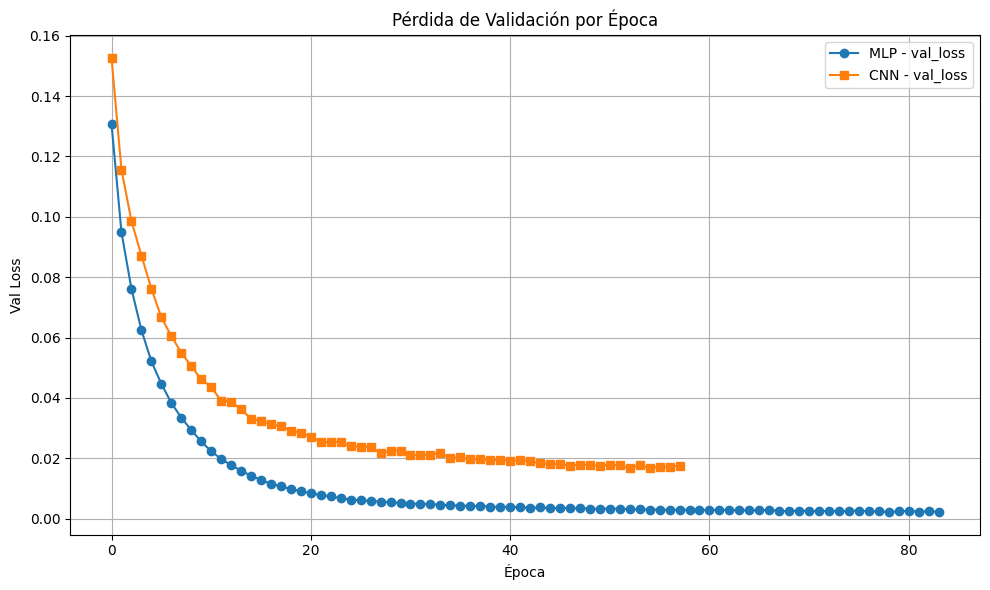

In [ ]:
# Obtener el historial de val_loss de cada modelo
val_loss_mlp = history_mlp.history['val_loss']
val_loss_cnn = history_cnn.history['val_loss']

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(val_loss_mlp, label='MLP - val_loss', marker='o')
plt.plot(val_loss_cnn, label='CNN - val_loss', marker='s')

plt.title('Pérdida de Validación por Época')
plt.xlabel('Época')
plt.ylabel('Val Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

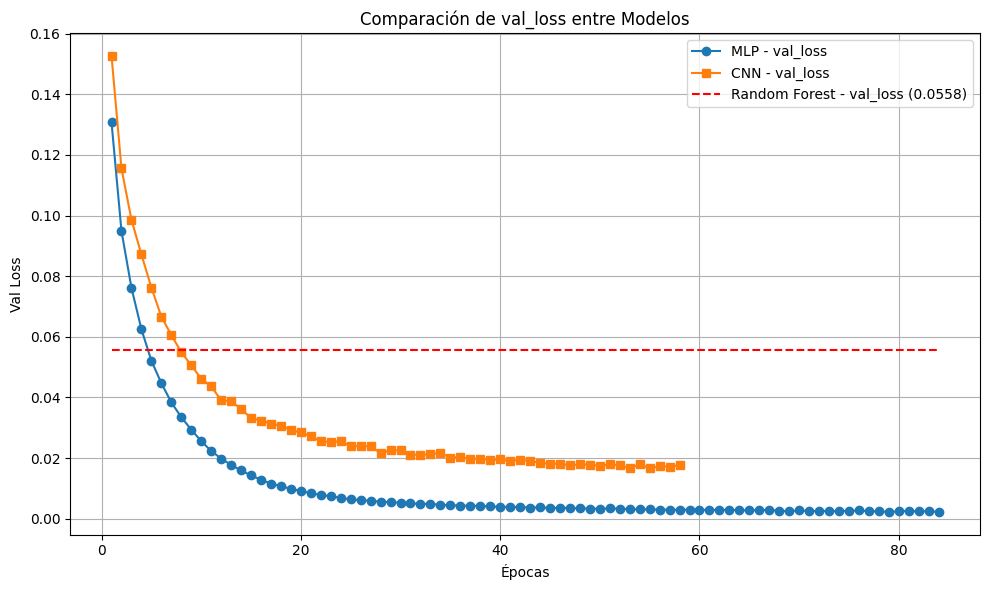

In [ ]:
from sklearn.metrics import log_loss
val_loss_rf = log_loss(y_test, y_pred_proba_rf)  # solo un valor


val_loss_mlp = history_mlp.history['val_loss']
val_loss_cnn = history_cnn.history['val_loss']

# Número de épocas para MLP y CNN
epochs_mlp = range(1, len(val_loss_mlp) + 1)
epochs_cnn = range(1, len(val_loss_cnn) + 1)

# Gráfico
plt.figure(figsize=(10, 6))

plt.plot(epochs_mlp, val_loss_mlp, label='MLP - val_loss', marker='o')
plt.plot(epochs_cnn, val_loss_cnn, label='CNN - val_loss', marker='s')
plt.hlines(val_loss_rf, xmin=1, xmax=max(len(val_loss_mlp), len(val_loss_cnn)),
           colors='red', linestyles='dashed', label=f'Random Forest - val_loss ({val_loss_rf:.4f})')

plt.title('Comparación de val_loss entre Modelos')
plt.xlabel('Épocas')
plt.ylabel('Val Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


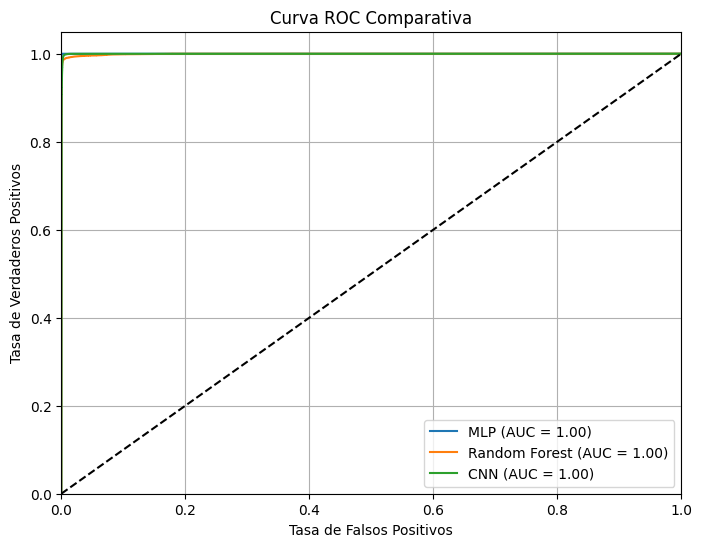

In [ ]:
from sklearn.metrics import roc_curve, auc
# Calcular probabilidades
y_pred_proba_mlp = model_mlp.predict(X_test).ravel()  # Asegura que esté en forma plana
y_pred_proba_cnn = model_cnn.predict(X_test_cnn).ravel()

# Curvas ROC
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_proba_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC = {roc_auc_cnn:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Comparativa')
plt.legend(loc='lower right')
plt.grid()
plt.show()

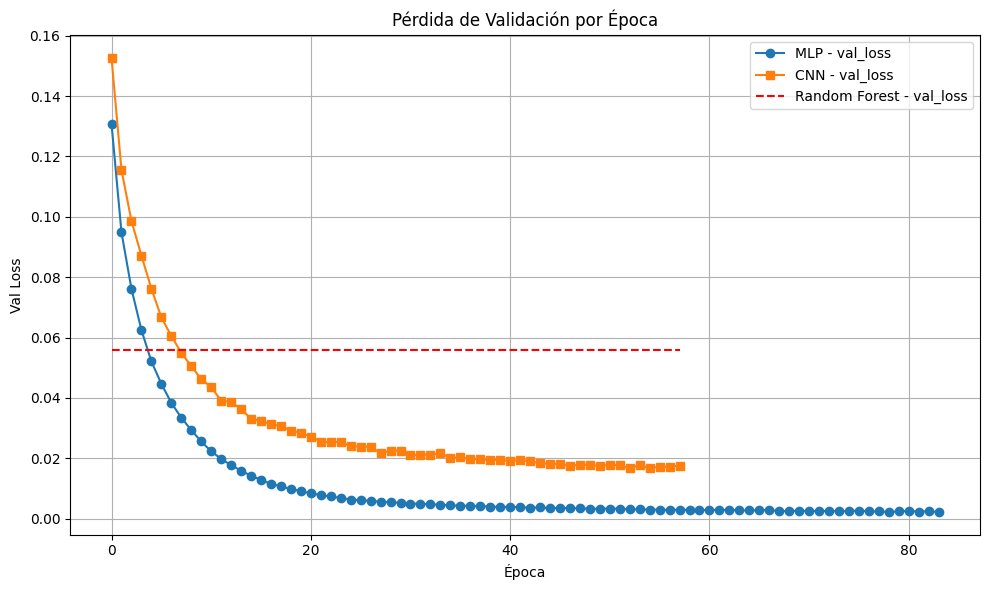

In [ ]:
from sklearn.metrics import log_loss

# Calcular log loss (equivalente a "val_loss") para Random Forest
val_loss_rf = log_loss(y_test, y_pred_proba_rf)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(val_loss_mlp, label='MLP - val_loss', marker='o')
plt.plot(val_loss_cnn, label='CNN - val_loss', marker='s')
plt.hlines(val_loss_rf, xmin=0, xmax=len(val_loss_cnn)-1, colors='r', linestyles='dashed', label='Random Forest - val_loss')

plt.title('Pérdida de Validación por Época')
plt.xlabel('Época')
plt.ylabel('Val Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


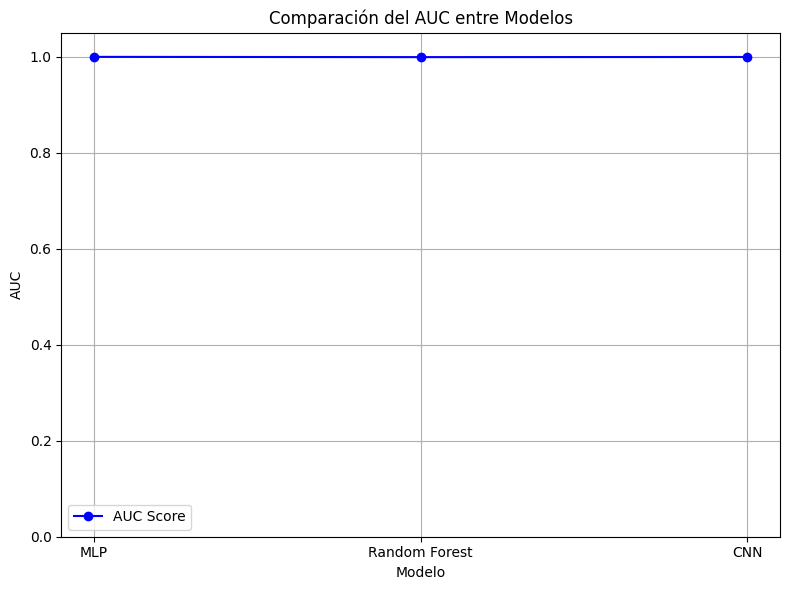

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Asegúrate de que los outputs sean probabilidades planas (ravel)
y_pred_proba_mlp = model_mlp.predict(X_test).ravel()
y_pred_proba_cnn = model_cnn.predict(X_test_cnn).ravel()

# AUC para cada modelo
auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_cnn = roc_auc_score(y_test, y_pred_proba_cnn)

# Valores para graficar
modelos = ['MLP', 'Random Forest', 'CNN']
auc_scores = [auc_mlp, auc_rf, auc_cnn]

# Gráfico lineal
plt.figure(figsize=(8, 6))
plt.plot(modelos, auc_scores, marker='o', linestyle='-', color='blue', label='AUC Score')
plt.title('Comparación del AUC entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('AUC')
plt.ylim(0.0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

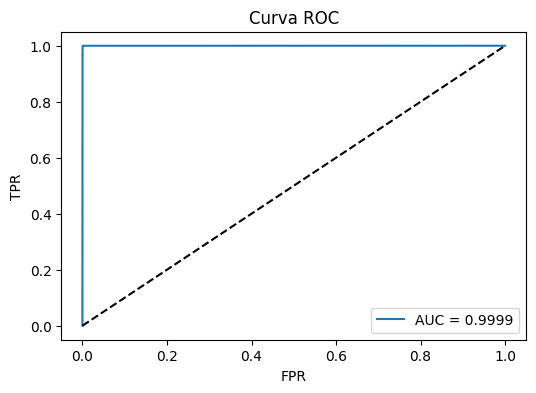

In [ ]:
#Realizamos la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred):.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

#### El modelo tiene un buen desempeño general tanto en el conjunto de entrenamiento como en el de validación, ya que las precisiones son altas (cerca de 99.97% y 99.96%, respectivamente).

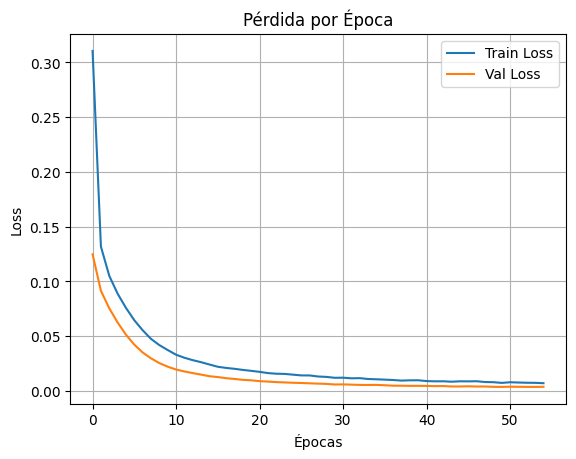

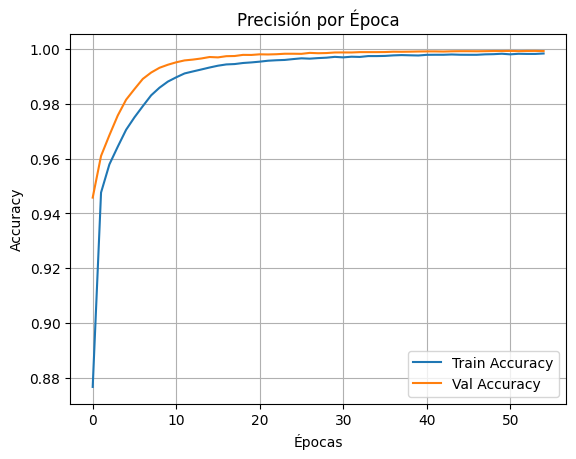

In [ ]:
# Gráfica de pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

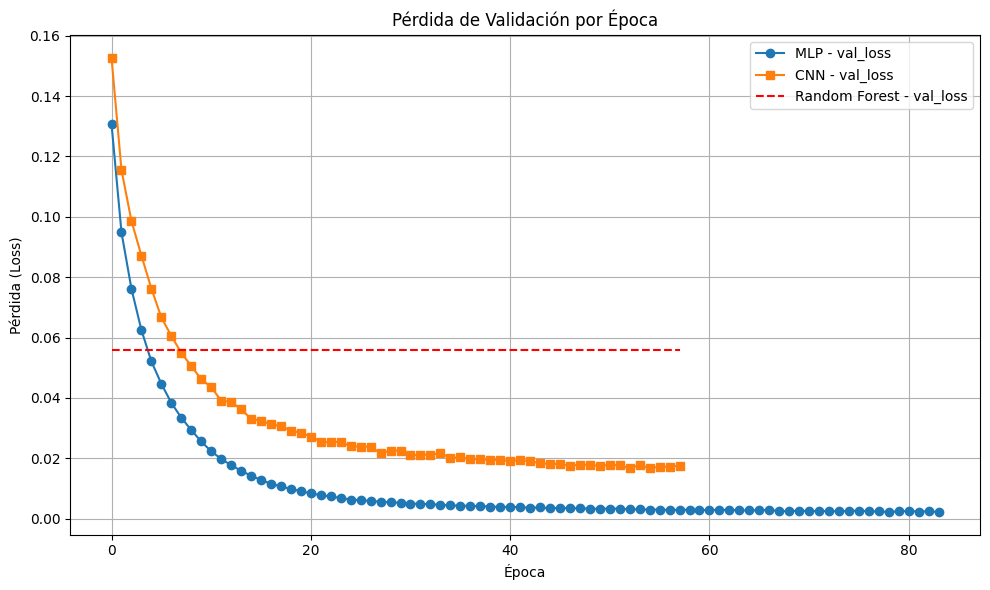

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Pérdida por época (val_loss) de MLP y CNN
val_loss_mlp = history_mlp.history['val_loss']
val_loss_cnn = history_cnn.history['val_loss']

# Pérdida única para Random Forest en validación
val_loss_rf = log_loss(y_test, y_pred_proba_rf)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(val_loss_mlp, label='MLP - val_loss', marker='o')
plt.plot(val_loss_cnn, label='CNN - val_loss', marker='s')
plt.hlines(val_loss_rf, xmin=0, xmax=len(val_loss_cnn)-1, colors='r', linestyles='dashed', label='Random Forest - val_loss')

plt.title('Pérdida de Validación por Época')
plt.xlabel('Época')
plt.ylabel('Pérdida (Loss)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()